<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Version_01_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float

In [ ]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 124 (delta 5), reused 0 (delta 0), pack-reused 113
Receiving objects: 100% (124/124), 37.66 MiB | 15.36 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Collect Data

In [ ]:
import os
path = os.listdir('/content/drive/MyDrive/Fungal/Training')
classes = {'Early_Blight':0, 'Late_Blight':1} 

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 200
CHANNELS=2
EPOCHS=50

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Fungal/Training',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 800 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Early_Blight', 'Late_Blight']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 200, 200, 3)
[0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0]


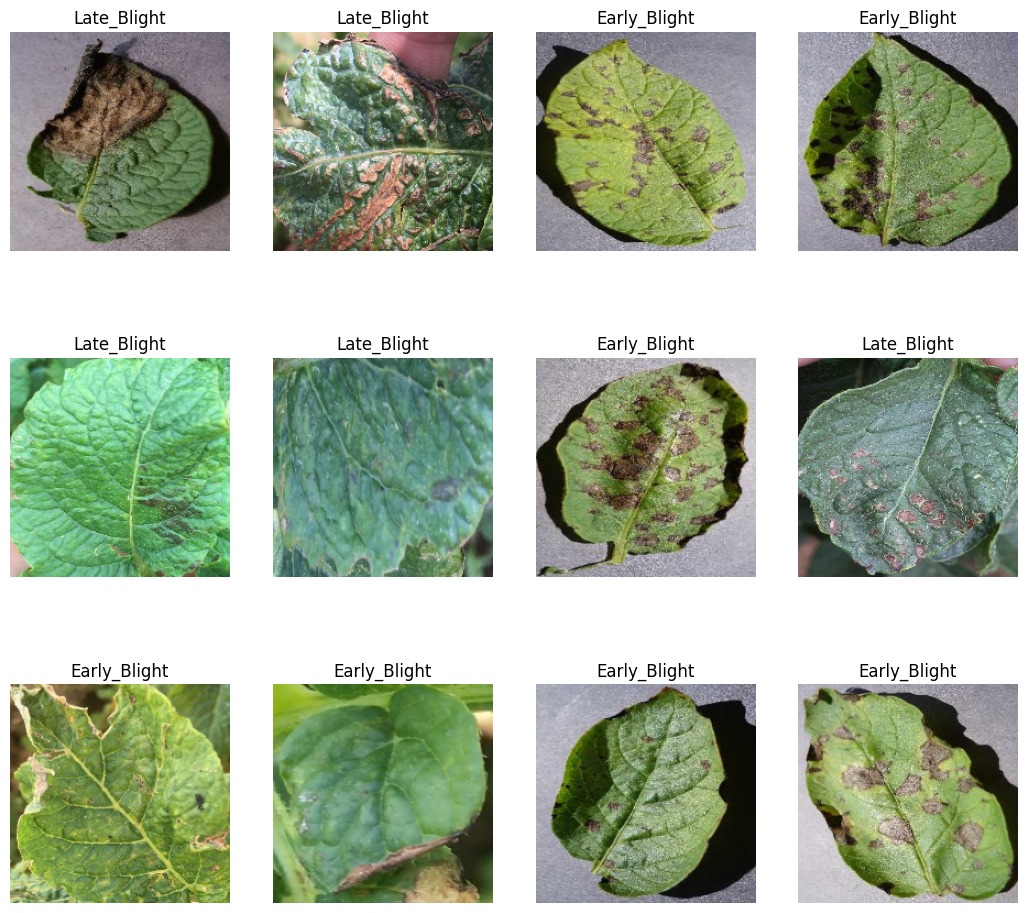

In [ ]:
plt.figure(figsize=(13, 12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

Preprocessing (Resize,color contrast, histrogram,clahe)

In [ ]:
import cv2

img_no=1

x=[]
y=[]
z=[]
histo=[]

for cls in classes:

    pth = '/content/drive/MyDrive/Fungal/Training/'+cls

    for j in os.listdir(pth):

        originalImage = cv2.imread(pth+'/'+j,1)

        #Resize
        resizedImage = cv2.resize(originalImage, (200,200))
        
        #contrast improve
        colorContrastImage=img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))
        #smooth image
        #smoothImage=img_as_ubyte(cv2.GaussianBlur(colorContrastImage, (5,5), 0, borderType=cv2.BORDER_CONSTANT))
        
        #Histogram equalize
        R, G, B = cv2.split(colorContrastImage)
        op_R= cv2.equalizeHist(R)
        op_G= cv2.equalizeHist(G)
        op_B= cv2.equalizeHist(B)
        histogramImage=cv2.merge((op_R,op_G,op_B))
        
        #clahe apply
        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
        op2_R= clahe.apply(R)
        op2_G= clahe.apply(G)
        op2_B= clahe.apply(B)
        claheImage=cv2.merge((op2_R,op2_G,op2_B))
        x.append(claheImage)
        
        ##cv2.imwrite('../FungalDataset1/Preprocessed1/'+str(img_no)+'.jpg',claheImage) 
        
        img_no+=1

        y.append(classes[cls])
        z.append(originalImage)
        histo.append(histogramImage)

Original Image

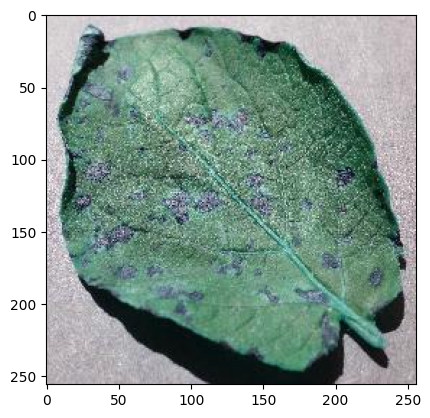

In [ ]:
plt.imshow(z[1])

Pre processed Image

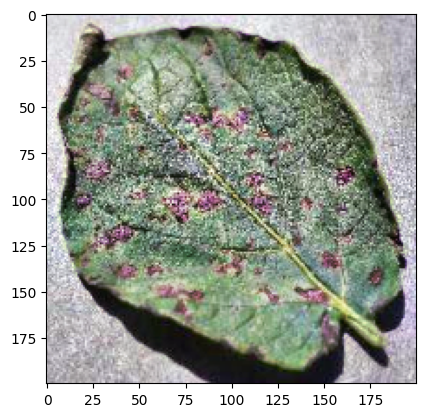

In [ ]:
plt.imshow(x[1])

In [ ]:
print(resizedImage.shape)

(200, 200, 3)


Removing Background


In [ ]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
from rembg import remove

In [ ]:
q=[]

for j in x:
        new_img = img_as_ubyte(j)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        q.append(bg_rem_img)

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 11.2GB/s]


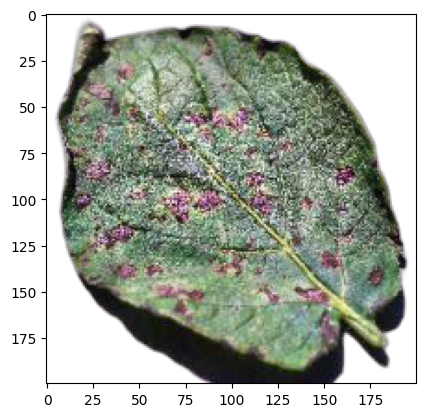

In [ ]:
plt.imshow(q[1])

Start - HOG

In [ ]:
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage import exposure

In [ ]:
h=[]
MC=True
for j in q:
    hogfv, hog_image = hog(j, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True, multichannel=MC)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,5))
    h.append(hog_image_rescaled)

<ipython-input-21-0562a0bac338>:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hogfv, hog_image = hog(j, orientations=9, pixels_per_cell=(16, 16),


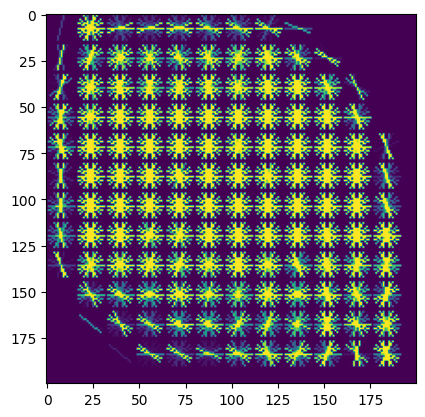

In [ ]:
plt.imshow(h[1])

End of HOG

1.0 0.0
1.0 0.0
0.00392156862745098 0.0
0.00392156862745098 0.0
(640, 40000) (160, 40000)
Training Score: 1.0
Testing Score: 0.79375


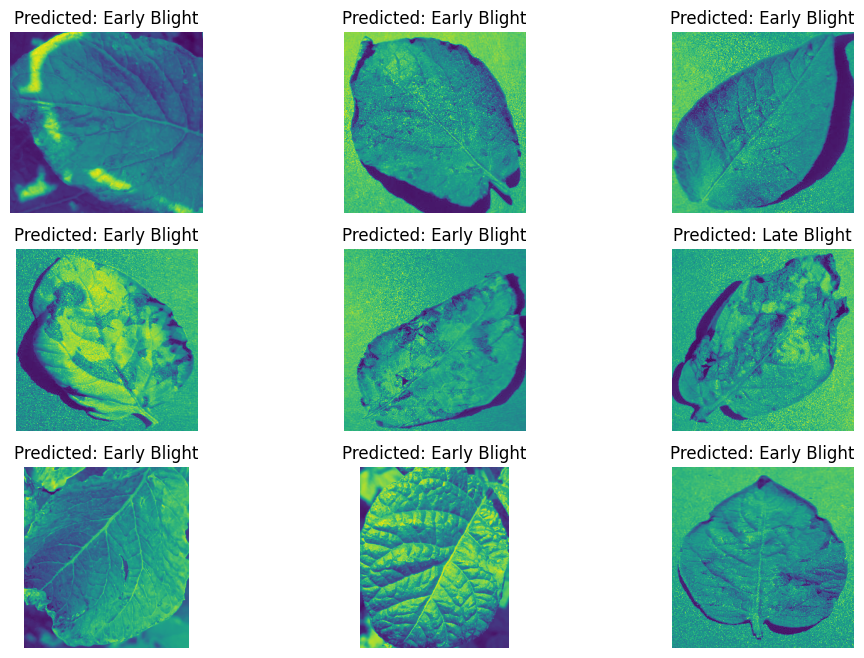

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import warnings

# Convert h and y to numpy arrays
h = np.array(h)
y = np.array(y)

# Unique values in h and y
np.unique(h)
np.unique(y)

# Shape of h
h.shape

# Reshape h
h_updated = h.reshape(len(h), -1)
h_updated.shape

# Split data into training and testing sets
htrain, htest, ytrain, ytest = train_test_split(h_updated, y, random_state=10, test_size=.20)

# Print the shapes of training and testing sets
htrain.shape, htest.shape

# Feature scaling
print(htrain.max(), htrain.min())
print(htest.max(), htest.min())
htrain = htrain / 255
htest = htest / 255
print(htrain.max(), htrain.min())
print(htest.max(), htest.min())

# Feature selection: PCA
print(htrain.shape, htest.shape)
pca = PCA(.98)
pca_train = pca.fit_transform(htrain)
pca_test = pca.transform(htest)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(pca_train, ytrain)

# Evaluate the Random Forest model
print("Training Score:", rf.score(pca_train, ytrain))
print("Testing Score:", rf.score(pca_test, ytest))

# Prediction
pred = rf.predict(pca_test)
np.where(ytest != pred)

from array import array
from numpy import int64
pred[1]
ytest[1]

dec = {0: 'Early Blight', 1: 'Late Blight'}

plt.figure(figsize=(12, 8))
p = os.listdir('/content/drive/MyDrive/Fungal/Training/')
c = 1
for i in os.listdir('/content/drive/MyDrive/Fungal/Training/Early_Blight/')[:9]:
    plt.subplot(3, 3, c)
    img = cv2.imread('/content/drive/MyDrive/Fungal/Training/Early_Blight/' + i, 0)
    if img is None:
        print('Wrong path:', path)
    else:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255
        img1_pca = pca.transform(img1)  # Apply PCA transformation to input image data
        p = rf.predict(img1_pca)
        #plt.title(dec[p[0]])
        plt.title('Predicted: {}'.format(dec[p[0]]))
        plt.imshow(img)
        plt.axis('off')
        c += 1


In [ ]:
pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
from flask import Flask, request, jsonify
from PIL import Image
import numpy as np


In [ ]:

import pickle

# Load the original model
original_model = ...

# Repickle the model
new_model_path = '/content/drive/MyDrive/Fungal/ModelSave/fungal_model_1.pkl'
with open(new_model_path, 'wb') as file:
    pickle.dump(original_model, file)


In [ ]:
model_path = '/content/drive/MyDrive/Fungal/ModelSave/fungal_model_1.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

In [ ]:
app = Flask(__name__)

In [ ]:

@app.route('/classify', methods=['POST'])
def classify():
    image_file = request.files['image']
    
    return jsonify({'Disease_Type is ': predicted_disease})


In [ ]:

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
